In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import r2_score,mean_absolute_error, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df["Ram"] = df["Ram"].str.replace("GB", " ")
df["Weight"] = df["Weight"].str.replace("kg", " ")

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df["Ram"] = df["Ram"].astype("int64")
df["Weight"] = df["Weight"].astype("float64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

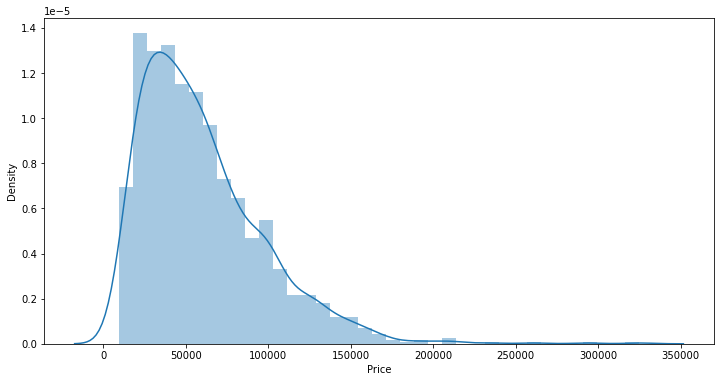

In [15]:
plt.figure(figsize=(12, 6))
sns.distplot(df["Price"])

<AxesSubplot:>

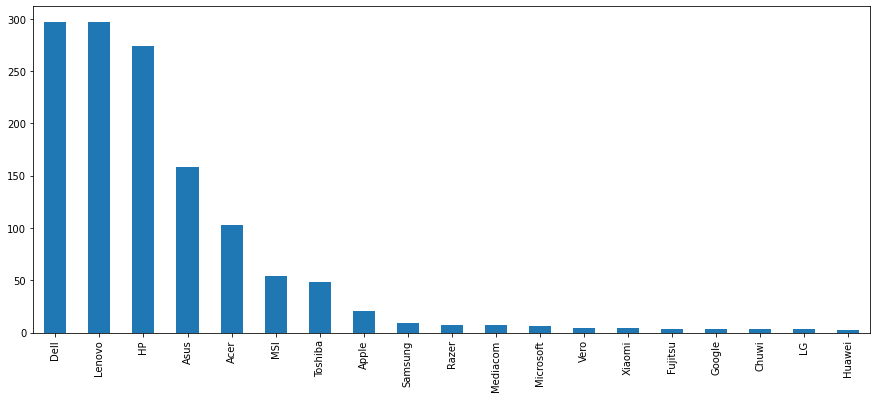

In [16]:
plt.figure(figsize=(15, 6))
df["Company"].value_counts().plot(kind="bar")

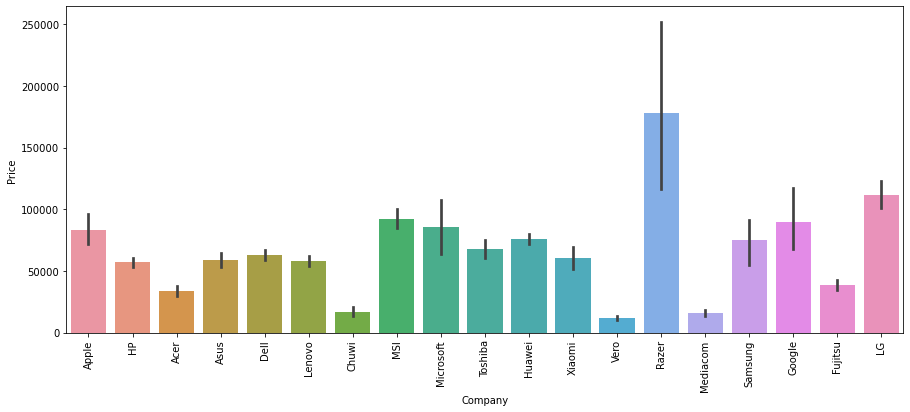

In [17]:
plt.figure(figsize=(15 , 6))
sns.barplot(x=df["Company"] , y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<AxesSubplot:>

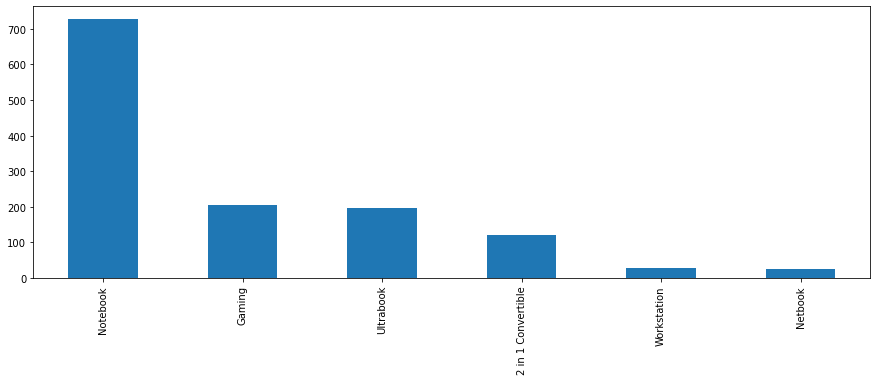

In [18]:
plt.figure(figsize=(15, 5))
df["TypeName"].value_counts().plot(kind="bar")

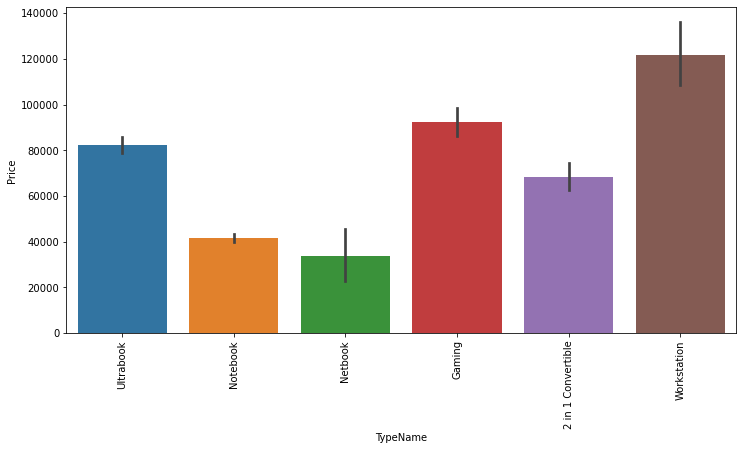

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["TypeName"] , y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

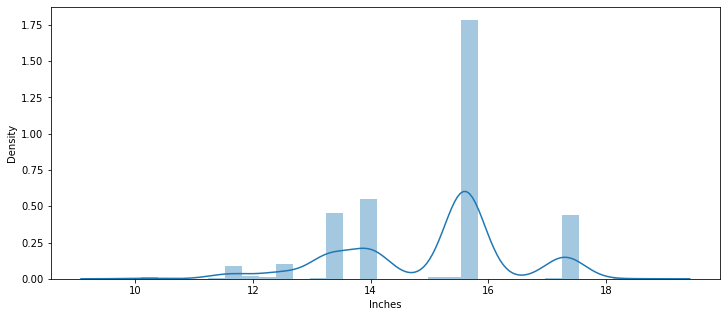

In [20]:
plt.figure(figsize=(12, 5))
sns.distplot(df["Inches"])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

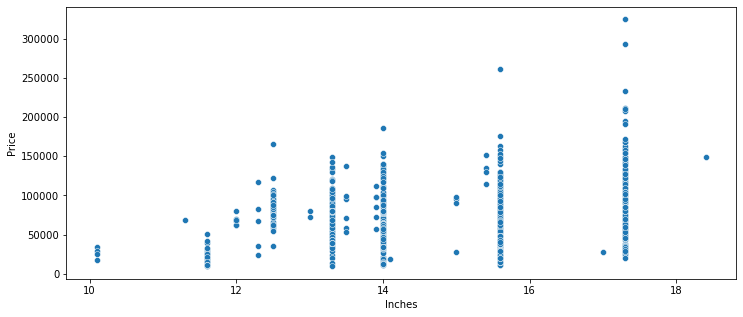

In [21]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Inches"], y=df["Price"])

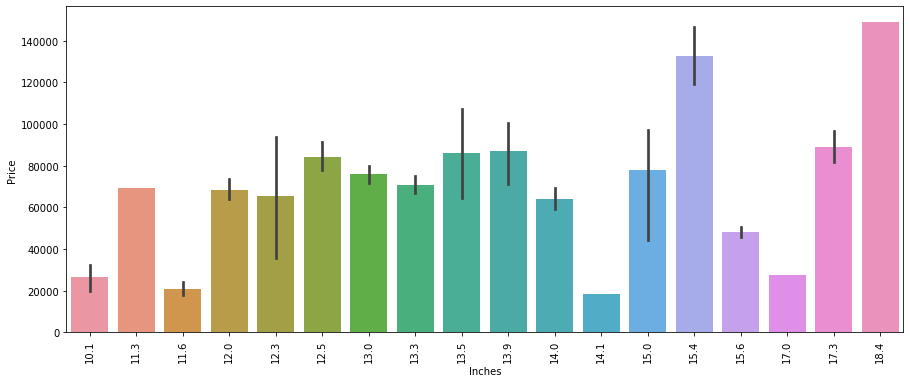

In [22]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["Inches"], y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [23]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [24]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [26]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
417,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,79920.0000,0
1016,HP,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,41025.0672,0
601,HP,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.10,35616.6144,0
575,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,13266.7200,0
602,Acer,Notebook,14.0,Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.60,17529.1200,0


In [27]:
df["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

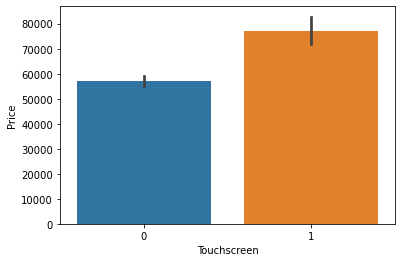

In [28]:

sns.barplot(x=df["Touchscreen"] , y=df["Price"])

In [29]:
df["IPS"] = df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [31]:
df["IPS"].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<AxesSubplot:xlabel='IPS', ylabel='Price'>

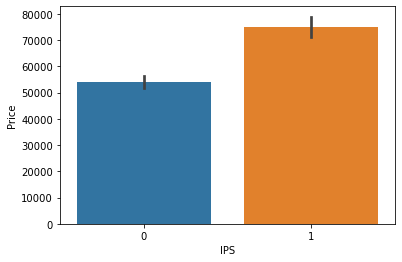

In [32]:
sns.barplot(x=df["IPS"], y=df["Price"])

In [33]:
temp = df["ScreenResolution"].str.split("x", expand=True)

In [34]:
df["x_res"] = temp[0]
df["y_res"] = temp[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
df["x_res"] = df["x_res"].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [39]:
df["x_res"] = df["x_res"].astype("int64")
df["y_res"] = df["y_res"].astype("int64")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [41]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [42]:
df["ppi"] = (((df["x_res"]**2) + (df["y_res"]**2))**0.5/df["Inches"]).astype("float")

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [44]:
df.drop(columns=["ScreenResolution", "Inches", "x_res", "y_res"], axis=1, inplace=True)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [46]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Atom Z8350 1.92GHz         1
AMD E-Series 6110 1.5GHz         1
Intel Core i5 6440HQ 2.6GHz      1
AMD FX 8800P 2.1GHz              1
Intel Atom x5-Z8300 1.44GHz      1
Name: Cpu, Length: 118, dtype: int64

In [47]:
df["Cpu name"] = df["Cpu"].apply(lambda x:" " .join(x.split()[0:3]))

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [49]:
def fetch_processor(x):
    if x == "Intel Core i5" or x == "Intel Core i7" or x == "Intel Core i3":
        return x
    else:
        if x.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [50]:
df["Cpu Brand"] = df["Cpu name"].apply(fetch_processor)

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

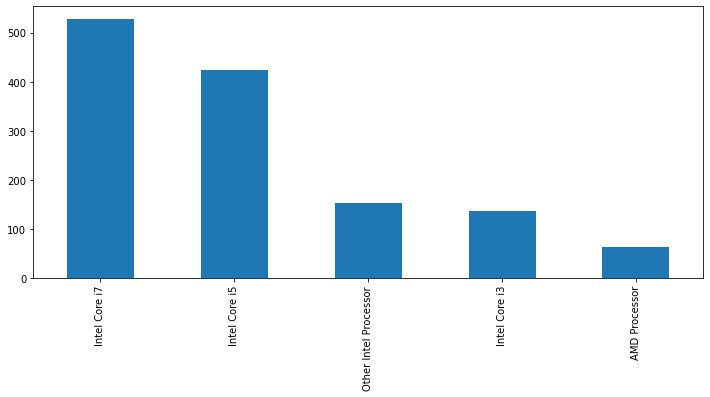

In [52]:
plt.figure(figsize=(12, 5))
df["Cpu Brand"].value_counts().plot(kind="bar")

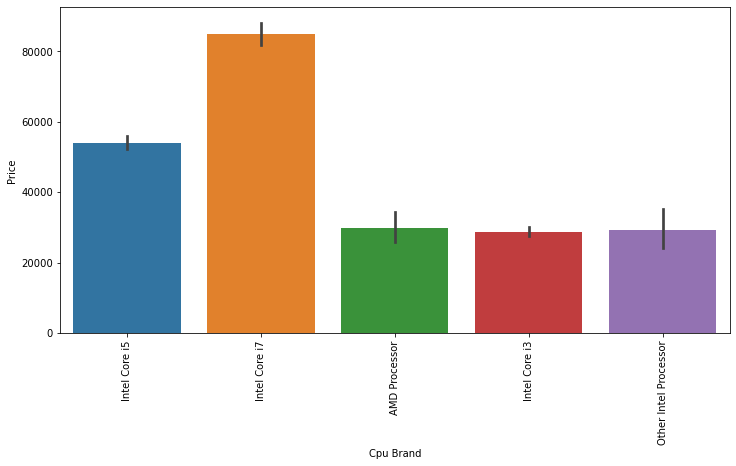

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Cpu Brand"], y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [54]:
df.drop(columns=["Cpu", "Cpu name"], axis=1, inplace = True)

In [55]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

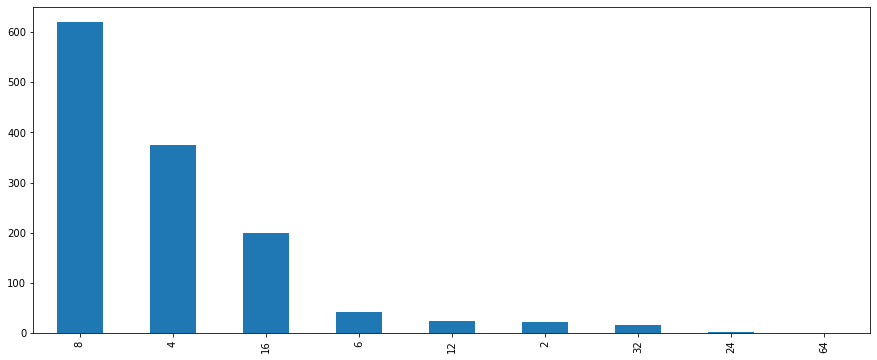

In [56]:
plt.figure(figsize=(15, 6))
df["Ram"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ram', ylabel='Price'>

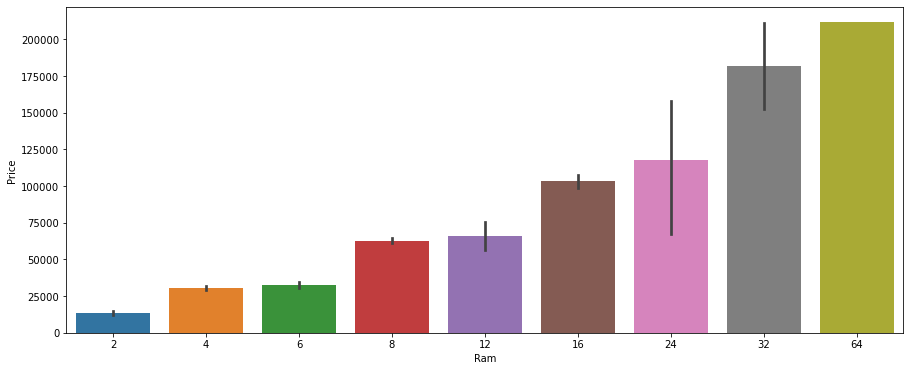

In [57]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["Ram"], y=df["Price"])

In [58]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
8GB SSD                            1
5

In [59]:
df["Gpu"].value_counts()

Intel HD Graphics 620        281
Intel HD Graphics 520        185
Intel UHD Graphics 620        68
Nvidia GeForce GTX 1050       66
Nvidia GeForce GTX 1060       48
                            ... 
AMD Radeon Pro 455             1
AMD Radeon RX 560              1
Nvidia GeForce GTX1050 Ti      1
AMD R17M-M1-70                 1
AMD Radeon R5 430              1
Name: Gpu, Length: 110, dtype: int64

In [60]:
df["Gpu Brand"] = df["Gpu"].apply(lambda x: x.split()[0])

In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


<AxesSubplot:>

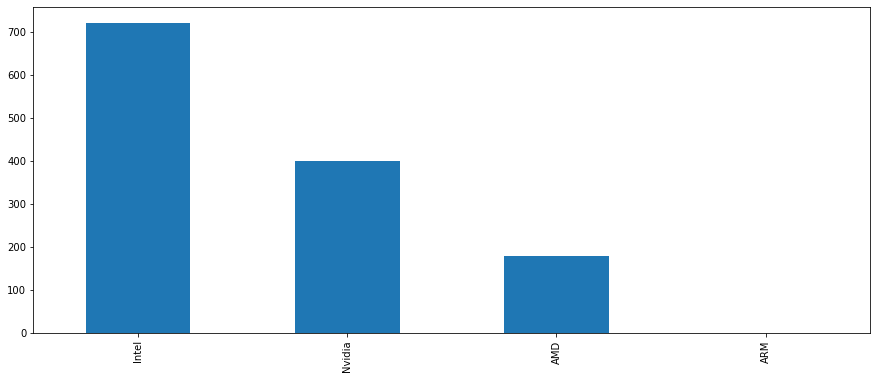

In [62]:
plt.figure(figsize=(15, 6))
df["Gpu Brand"].value_counts().plot(kind="bar")

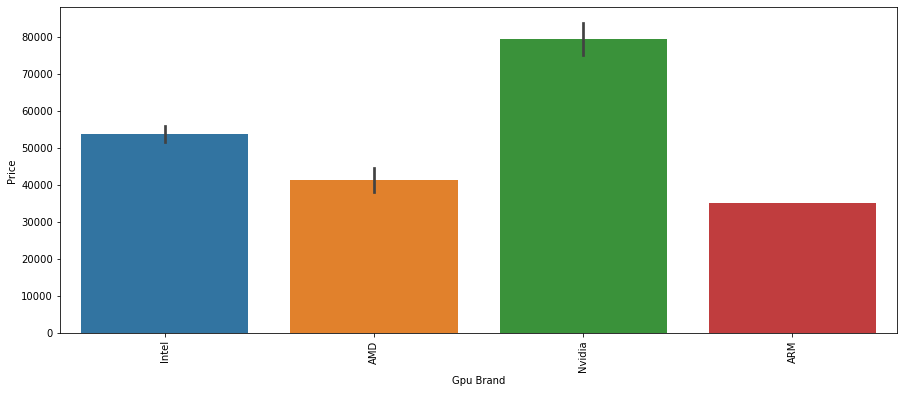

In [63]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["Gpu Brand"] , y=df["Price"])
plt.xticks(rotation= "vertical")
plt.show()

In [64]:
df.drop("Gpu", axis=1 , inplace=True)

In [65]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


<AxesSubplot:>

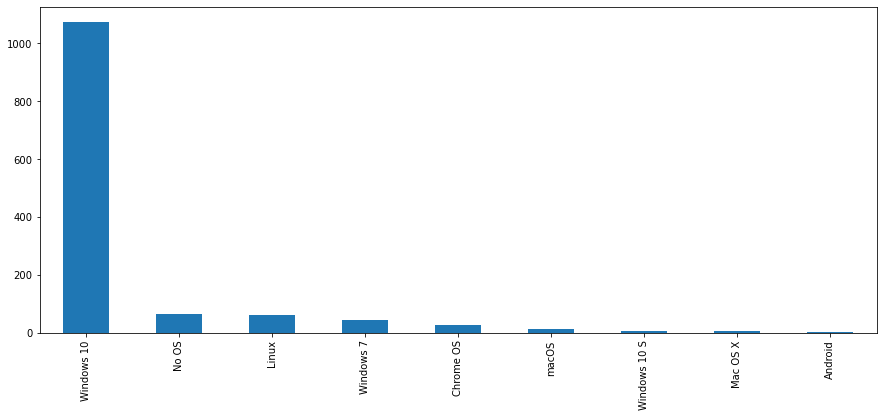

In [66]:
plt.figure(figsize=(15, 6))
df["OpSys"].value_counts().plot(kind="bar")

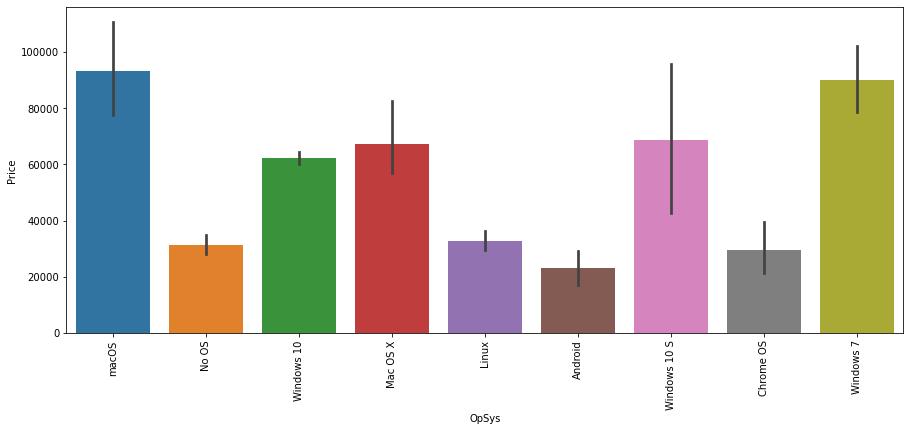

In [67]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["OpSys"], y=df["Price"])
plt.xticks(rotation= "vertical")
plt.show()

In [68]:
def cat_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == " Mac OS X":
        return "Mac"
    else:
        return "Others/No Os/linux"

In [69]:
df["Os"] = df["OpSys"].apply(cat_os)

In [70]:
df.drop("OpSys", axis=1, inplace = True)

In [71]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/linux
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [72]:
df["Weight"].value_counts()

2.200    126
2.100     58
2.000     45
2.400     44
2.300     41
        ... 
2.191      1
2.750      1
2.380      1
3.520      1
2.591      1
Name: Weight, Length: 171, dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

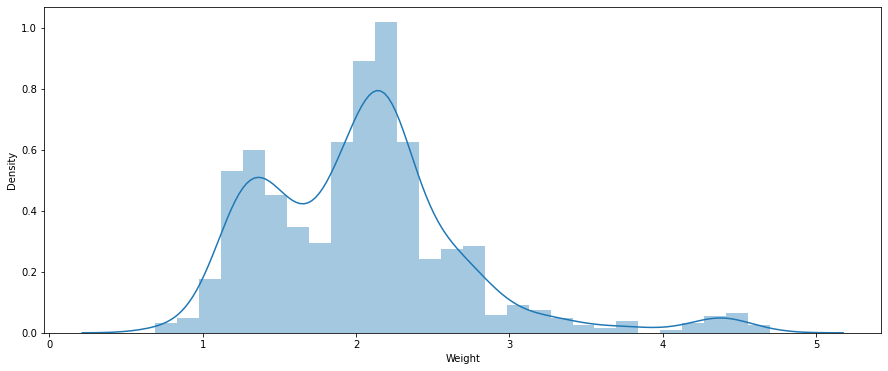

In [73]:
plt.figure(figsize=(15, 6))
sns.distplot(df["Weight"])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

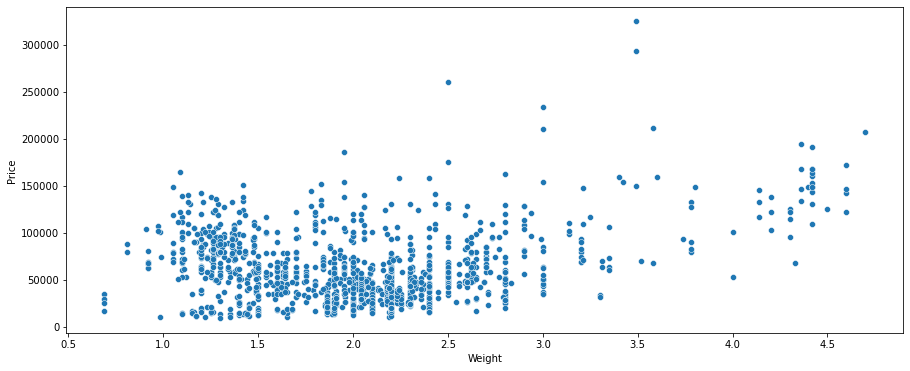

In [74]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df["Weight"], y=df["Price"])

In [75]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/linux
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [76]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
8GB SSD                            1
5

In [77]:
new_mem = df["Memory"].apply(lambda x: x.split(" ")[0:2])

In [78]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/linux
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [79]:
new_mem

0         [128GB, SSD]
1       [128GB, Flash]
2         [256GB, SSD]
3         [512GB, SSD]
4         [256GB, SSD]
             ...      
1298      [128GB, SSD]
1299      [512GB, SSD]
1300     [64GB, Flash]
1301        [1TB, HDD]
1302      [500GB, HDD]
Name: Memory, Length: 1303, dtype: object

In [80]:
def get_SSD(x):
    if x == "128GB SSD" or x == "256GB SSD" or x == "512GB SSD" or x == "64GB SSD" or  x == "1T SSD" or x =="8GB SSD" or x == "240GB SSD":
        return x
    else:
        return 0

In [81]:
df["SSD"] = df["Memory"].apply(get_SSD)

In [82]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128GB SSD
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/linux,256GB SSD
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512GB SSD
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256GB SSD


In [83]:
def get_Hdd(x):
    if x == "1TB HDD" or x == "500GB HDD" or x =="2TB HDD " or x== "128GB HDD" or x== "32GB HDD" :
        return x
    else:
        return 0

In [84]:
df["HDD"] = df["Memory"].apply(get_Hdd)

In [85]:
df.head(15)

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD,HDD
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128GB SSD,0
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/linux,256GB SSD,0
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512GB SSD,0
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256GB SSD,0
5,Acer,Notebook,4,500GB HDD,2.10,21312.0000,0,0,100.454670,AMD Processor,AMD,Windows,0,500GB HDD
6,Apple,Ultrabook,16,256GB Flash Storage,2.04,114017.6016,0,1,220.534624,Intel Core i7,Intel,Others/No Os/linux,0,0
7,Apple,Ultrabook,8,256GB Flash Storage,1.34,61735.5360,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
8,Asus,Ultrabook,16,512GB SSD,1.30,79653.6000,0,0,157.350512,Intel Core i7,Nvidia,Windows,512GB SSD,0
9,Acer,Ultrabook,8,256GB SSD,1.60,41025.6000,0,1,157.350512,Intel Core i5,Intel,Windows,256GB SSD,0


In [86]:
df.drop("Memory", axis=1 , inplace = True)

In [87]:
df.corr()["Price"]

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.473487
Name: Price, dtype: float64

<AxesSubplot:>

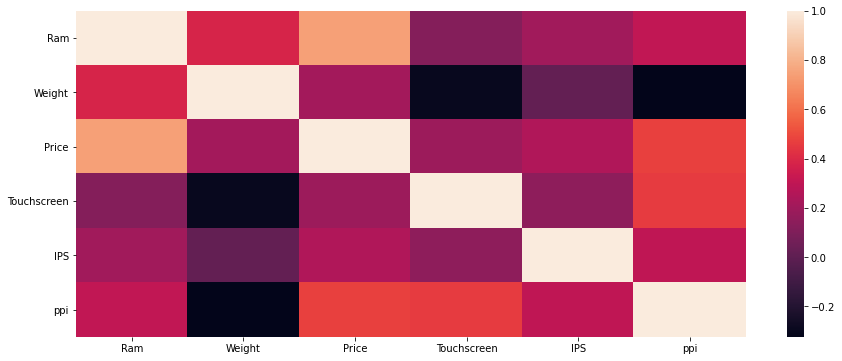

In [88]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr())

In [89]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD,HDD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128GB SSD,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/linux,256GB SSD,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512GB SSD,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256GB SSD,0


In [90]:
le = LabelEncoder()
df["Company"] = le.fit_transform(df["Company"])
df["TypeName"] = le.fit_transform(df["TypeName"])
df["Cpu Brand"] = le.fit_transform(df["Cpu Brand"])
df["Gpu Brand"] = le.fit_transform(df["Gpu Brand"])
df["Os"] = le.fit_transform(df["Os"])

In [91]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD,HDD
0,1,4,8,1.37,71378.6832,0,1,226.983005,2,2,0,128GB SSD,0
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,2,0,0,0
2,7,3,8,1.86,30636.0000,0,0,141.211998,2,2,1,256GB SSD,0
3,1,4,16,1.83,135195.3360,0,1,220.534624,3,0,0,512GB SSD,0
4,1,4,8,1.37,96095.8080,0,1,226.983005,2,2,0,256GB SSD,0


In [92]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD,HDD
420,10,0,16,2.0,101178.72,1,1,282.423996,3,3,2,512GB SSD,0


In [93]:
df["SSD"] = df["SSD"].str.replace("GB SSD", " ")

In [94]:
df["SSD"].isnull().sum()

694

In [95]:
df["SSD"].median()

256.0

In [96]:
df["SSD"] = df["SSD"].fillna(df["SSD"].mode()[0])

In [97]:
df["SSD"].isnull().sum()

0

In [98]:
df["HDD"] = df["HDD"].str.replace("TB HDD", " ")

In [99]:
def rem_HDD(x):
    if x == "500GB HDD" or x== "128GB HDD" or x== "32GB HDD" :
        return x.replace("GB HDD", " ")
    else:
        return x

In [100]:
df["HDD"] = df["HDD"].apply(rem_HDD)

In [101]:
df["HDD"].value_counts()

1       223
500     132
32        1
128       1
Name: HDD, dtype: int64

In [102]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD,HDD
0,1,4,8,1.37,71378.6832,0,1,226.983005,2,2,0,128,NaN
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,2,0,256,NaN
2,7,3,8,1.86,30636.0000,0,0,141.211998,2,2,1,256,NaN
3,1,4,16,1.83,135195.3360,0,1,220.534624,3,0,0,512,NaN
4,1,4,8,1.37,96095.8080,0,1,226.983005,2,2,0,256,NaN


In [103]:
df["HDD"].isnull().sum()

946

In [104]:
df["HDD"] = df["HDD"].fillna(0)

In [105]:
df["HDD"].isnull().sum()

0

In [106]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,Gpu Brand,Os,SSD,HDD
222,16,4,8,1.20,72620.6400,0,0,165.632118,3,2,2,256,0
380,7,1,8,3.35,63456.4800,0,1,127.335675,3,3,2,256,0
817,7,2,4,1.23,20512.8000,0,0,135.094211,4,2,1,256,0
940,7,1,8,2.75,74538.7200,0,1,127.335675,2,3,2,256,0
368,4,3,8,2.33,47898.7200,0,0,141.211998,3,0,2,256,0
574,10,3,4,2.05,36496.8000,0,0,141.211998,2,2,2,256,500
148,11,1,16,2.90,108105.1200,0,0,127.335675,3,3,2,256,0
1232,4,3,8,2.30,24988.8528,1,0,100.454670,1,2,2,256,1
950,7,5,8,2.00,119826.7200,0,1,141.211998,3,3,2,8,0
294,10,3,8,2.05,39373.9200,0,0,141.211998,2,2,2,256,0


In [107]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [108]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.3 , random_state=43)

In [109]:
len(x_train) , len(x_test)

(912, 391)

### Model Training 

In [110]:
linear_reg = LinearRegression()
linear_reg.fit(x_train , y_train)
y_pred = linear_reg.predict(x_test)
score = r2_score(y_test , y_pred)
score

0.6896000712909868

In [111]:
las = Lasso()
las.fit(x_train , y_train)
y_pred = las.predict(x_test)
las_score = r2_score(y_test , y_pred)
las_score

0.689593076861658

In [112]:
ridge = Ridge()
ridge.fit(x_train , y_train)
rid_y_pred = ridge.predict(x_test)
rid_score = r2_score(y_test , rid_y_pred)
rid_score

0.6895857447611995

In [113]:
tree = DecisionTreeRegressor()
tree.fit(x_train , y_train)
tree_y_pred = tree.predict(x_test)
tree_score = r2_score(y_test, tree_y_pred)
tree_score

0.6894088141841762

In [114]:
random = RandomForestRegressor()
random.fit(x_train , y_train)
random_y_pred = random.predict(x_test)
random_score = r2_score(y_test , random_y_pred)
random_score

0.8119714732686

In [115]:
import pickle
file = "rf_model.pkl"
pickle.dump(random, open(file, "wb"))